#주제: 유기견 분양

# 목표:
- 유기견의 분양가능성을 예측하여 홍보에 차별성을 부여함으로써 안락사 확률을 낮춘다
- 입양자가 원하는 강아지 특성을 토대로 유기견을 추천하여 분양효율을 높인다

# 데이터

## PetFinder.my Adoption Prediction
- 데이터 출처: https://www.kaggle.com/competitions/petfinder-adoption-prediction/data
- Data Fields
    - PetID - Unique hash ID of pet profile
    - AdoptionSpeed - Categorical speed of adoption. Lower is faster. This is the value to predict. See below section for more info.
    - Type - Type of animal (1 = Dog, 2 = Cat)
    - Name - Name of pet (Empty if not named)
    - Age - Age of pet when listed, in months
    - Breed1 - Primary breed of pet (Refer to BreedLabels dictionary)
    - Breed2 - Secondary breed of pet, if pet is of mixed breed (Refer to BreedLabels dictionary)
    - Gender - Gender of pet (1 = Male, 2 = Female, 3 = Mixed, if profile represents group of pets)
    - Color1 - Color 1 of pet (Refer to ColorLabels dictionary)
    - Color2 - Color 2 of pet (Refer to ColorLabels dictionary)
    - Color3 - Color 3 of pet (Refer to ColorLabels dictionary)
    - MaturitySize - Size at maturity (1 = Small, 2 = Medium, 3 = Large, 4 = Extra Large, 0 = Not Specified)
    - FurLength - Fur length (1 = Short, 2 = Medium, 3 = Long, 0 = Not Specified)
    - Vaccinated - Pet has been vaccinated (1 = Yes, 2 = No, 3 = Not Sure)
    - Dewormed - Pet has been dewormed (1 = Yes, 2 = No, 3 = Not Sure)
    - Sterilized - Pet has been spayed / neutered (1 = Yes, 2 = No, 3 = Not Sure)
    - Health - Health Condition (1 = Healthy, 2 = Minor Injury, 3 = Serious Injury, 0 = Not Specified)
    - Quantity - Number of pets represented in profile
    - Fee - Adoption fee (0 = Free)
    - State - State location in Malaysia (Refer to StateLabels dictionary)
    - RescuerID - Unique hash ID of rescuer
    - VideoAmt - Total uploaded videos for this pet
    - PhotoAmt - Total uploaded photos for this pet
    - Description - Profile write-up for this pet. The primary language used is English, with some in Malay or Chinese.
- AdoptionSpeed
    - Contestants are required to predict this value. The value is determined by how quickly, if at all, a pet is adopted. The values are determined in the following way:
        - 0 - Pet was adopted on the same day as it was listed.
        - 1 - Pet was adopted between 1 and 7 days (1st week) after being listed.
        - 2 - Pet was adopted between 8 and 30 days (1st month) after being listed.
        - 3 - Pet was adopted between 31 and 90 days (2nd & 3rd month) after being listed.
        - 4 - No adoption after 100 days of being listed. (There are no pets in this dataset that waited between 90 and 100 days).

## *Best-Fit* a Dog for me?
- 데이터 출처: https://www.kaggle.com/datasets/pranav941/hows-that-dog-for-me
- Data Fields
    - Breed - Name of the Breed (195 unique values)
    - Affectionate With Family - Affectionate Level with known people
    - Good With Young Children - How good are they with Young children
    - Good With Other Dogs - How well do they get along with other dogs
    - Shedding Level - How much do they shed (Hair-Fall)
    - Coat Grooming Frequency - How much Grooming / Brushing do they need
    - Drooling Level - How much do they Drool
    - Coat Type - Type of Coat
    - Coat Length - Length of Coat / Hair
    - Openness To Strangers - How well do they get along with strangers

## 서비스의 흐름
1. 특정 유기견의 분양의 예상 소요시간을 예측
    - 소요시간이 길 것으로 예상되는 유기견을 우선순위로 홍보하려는 목적
    - 소요시간에 영향을 주는 요소를 분석하여 유기견의 상태를 개선하려는 목적
2. 입양 희망자가 유기견에게 원하는 특성을 입력
    - 입력한 정보를 통해 적합한 품종을 추천
    - 보호중인 유기견 중 해당하는 품종을 나열

## 패키지 설치 및 import

#### kaggle 패키지 설치

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#### koreanize-matplotlib 패키지 설치

In [ ]:
!pip install koreanize-matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 42.9 MB/s eta 0:00:00


#### AutoViz 패키지 설치

In [ ]:
!pip install autoviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.3/356.3 kB 11.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 45.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 59.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 66.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.9/84.9 kB 8.5 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-2.5.1-py2.py3-none-any.whl size=351210 sha256=2c148a41cb434720a1e91d46176161039133f48c23a1fba9c14aa7c83cd5a1e1
  Stored in directory: /root/.cache/pip/wheels/51/92/44/e2ef13f803aa0

#### LazyPredict 패키지 설치

In [ ]:
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#### Optuna 패키지 설치

In [ ]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 7.3 MB/s eta 0:00:00


#### 패키지 import

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import koreanize_matplotlib

from pathlib import Path

from google.colab import drive

from autoviz.AutoViz_Class import AutoViz_Class
from lazypredict.Supervised import LazyClassifier
from lazypredict.Supervised import LazyRegressor

from sklearn.model_selection import train_test_split
%matplotlib inline

Output hidden; open in https://colab.research.google.com to view.

## 분양 예상 소요시간 예측

### 데이터 불러오기

#### 구글 드라이브 연결

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


#### 데이터 다운로드

In [ ]:
!cp -r drive/MyDrive/kaggle.json /content
!ls -1ha kaggle.json
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

kaggle.json


In [ ]:
!kaggle competitions download -c petfinder-adoption-prediction

100% 1.94G/1.94G [00:24<00:00, 49.4MB/s]
100% 1.94G/1.94G [00:24<00:00, 86.4MB/s]


In [ ]:
!unzip petfinder-adoption-prediction.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: train_sentiment/a89bfa0aa.json  
  inflating: train_sentiment/a89d4e8f3.json  
  inflating: train_sentiment/a89f8b241.json  
  inflating: train_sentiment/a89fd1f1e.json  
  inflating: train_sentiment/a8a1d4151.json  
  inflating: train_sentiment/a8a2aecc3.json  
  inflating: train_sentiment/a8a3c4f49.json  
  inflating: train_sentiment/a8a8f95f6.json  
  inflating: train_sentiment/a8b358af2.json  
  inflating: train_sentiment/a8b9d57b4.json  
  inflating: train_sentiment/a8ba4dfa1.json  
  inflating: train_sentiment/a8c19a325.json  
  inflating: train_sentiment/a8c336257.json  
  inflating: train_sentiment/a8c555240.json  
  inflating: train_sentiment/a8cdba660.json  
  inflating: train_sentiment/a8ce7d647.json  
  inflating: train_sentiment/a8cfb849e.json  
  inflating: train_sentiment/a8cfbf446.json  
  inflating: train_sentiment/a8d14470d.json  
  inflating: train_sentiment/a8d44452c.json  
  inflating: train_sentiment/a8d9108c4.json 

### 데이터 확인

In [ ]:
train_path = Path("train").joinpath("train.csv")

In [ ]:
orig_df = pd.read_csv(train_path)
orig_df.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,1,2,2,2,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He is energetic and playful. I rescued a couple of cats a few months ago but could not get them neutered in time as the clinic was fully scheduled. The result was this little kitty. I do not have enough space and funds to care for more cats in my household. Looking for responsible people to take over Nibble's care.,86e1089a3,1.00,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,2,3,3,3,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartment. It was shaking so I had to bring it home to provide temporary care.,6296e909a,2.00,0
2,1,Brisco,1,307,0,1,2,7,0,2,2,1,1,2,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,"Their pregnant mother was dumped by her irresponsible owner at the roadside near some shops in Subang Jaya. Gave birth to them at the roadside. They are all healthy and adorable puppies. Already dewormed, vaccinated and ready to go to a home. No tying or caging for long hours as guard dogs. However, it is acceptable to cage or tie for precautionary purposes. Interested to adopt pls call me.",3422e4906,7.00,3
3,1,Miko,4,307,0,2,1,2,0,2,1,1,1,2,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience waiting for her good master, plz call or sms for more details if you really get interested, thanks!!",5842f1ff5,8.00,2
4,1,Hunter,1,307,0,1,1,0,0,2,1,2,2,2,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,"This handsome yet cute boy is up for adoption. He is the most playful pal we've seen in our puppies. He loves to nibble on shoelaces , Chase you at such a young age. Imagine what a cute brat he will be when he grows. We are looking for a loving home for Hunter , one that will take care of him and give him the love that he needs. Please call urgently if you would like to adopt this cutie.",850a43f90,3.00,2


In [ ]:
orig_df.describe()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,AdoptionSpeed
count,14993.00,14993.00,14993.00,14993.00,14993.00,14993.00,14993.00,14993.00,14993.00,14993.00,14993.00,14993.00,14993.00,14993.00,14993.00,14993.00,14993.00,14993.00,14993.00,14993.00
mean,1.46,10.45,265.27,74.01,1.78,2.23,3.22,1.88,1.86,1.47,1.73,1.56,1.91,1.04,1.58,21.26,41346.03,0.06,3.89,2.52
std,0.50,18.16,60.06,123.01,0.68,1.75,2.74,2.98,0.55,0.60,0.67,0.70,0.57,0.20,1.47,78.41,32.44,0.35,3.49,1.18
min,1.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,41324.00,0.00,0.00,0.00
25%,1.00,2.00,265.00,0.00,1.00,1.00,0.00,0.00,2.00,1.00,1.00,1.00,2.00,1.00,1.00,0.00,41326.00,0.00,2.00,2.00
50%,1.00,3.00,266.00,0.00,2.00,2.00,2.00,0.00,2.00,1.00,2.00,1.00,2.00,1.00,1.00,0.00,41326.00,0.00,3.00,2.00
75%,2.00,12.00,307.00,179.00,2.00,3.00,6.00,5.00,2.00,2.00,2.00,2.00,2.00,1.00,1.00,0.00,41401.00,0.00,5.00,4.00
max,2.00,255.00,307.00,307.00,3.00,7.00,7.00,7.00,4.00,3.00,3.00,3.00,3.00,3.00,20.00,3000.00,41415.00,8.00,30.00,4.00


In [ ]:
orig_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           14993 non-null  int64  
 1   Name           13736 non-null  object 
 2   Age            14993 non-null  int64  
 3   Breed1         14993 non-null  int64  
 4   Breed2         14993 non-null  int64  
 5   Gender         14993 non-null  int64  
 6   Color1         14993 non-null  int64  
 7   Color2         14993 non-null  int64  
 8   Color3         14993 non-null  int64  
 9   MaturitySize   14993 non-null  int64  
 10  FurLength      14993 non-null  int64  
 11  Vaccinated     14993 non-null  int64  
 12  Dewormed       14993 non-null  int64  
 13  Sterilized     14993 non-null  int64  
 14  Health         14993 non-null  int64  
 15  Quantity       14993 non-null  int64  
 16  Fee            14993 non-null  int64  
 17  State          14993 non-null  int64  
 18  Rescue

#### 전처리
- Name: 이름이 있으면 1, 없으면 0으로 수정
- State: drop
- RescuerID: drop
- Description: 문장의 길이로 수정
- PetID: drop

In [ ]:
df = orig_df.copy()

In [ ]:
df.drop(labels=["Name", "State", "RescuerID", "PetID"], axis=1, inplace=True)

In [ ]:
df["Description"] = df["Description"].apply(lambda text: len(str(text)))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           14993 non-null  int64  
 1   Name           14993 non-null  bool   
 2   Age            14993 non-null  int64  
 3   Breed1         14993 non-null  int64  
 4   Breed2         14993 non-null  int64  
 5   Gender         14993 non-null  int64  
 6   Color1         14993 non-null  int64  
 7   Color2         14993 non-null  int64  
 8   Color3         14993 non-null  int64  
 9   MaturitySize   14993 non-null  int64  
 10  FurLength      14993 non-null  int64  
 11  Vaccinated     14993 non-null  int64  
 12  Dewormed       14993 non-null  int64  
 13  Sterilized     14993 non-null  int64  
 14  Health         14993 non-null  int64  
 15  Quantity       14993 non-null  int64  
 16  Fee            14993 non-null  int64  
 17  VideoAmt       14993 non-null  int64  
 18  Descri

#### 데이터 나누기

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1],
                                                    df.iloc[:, -1],
                                                    test_size=0.2,
                                                    stratify=df.iloc[:, -1],
                                                    random_state=2023)

print("X_train: {}, \nX_test: {}, \ny_train: {}, \ny_test: {}".format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

X_train: (11994, 20), 
X_test: (2999, 20), 
y_train: (11994,), 
y_test: (2999,)


### 모델 선정

#### LazyClassifier 사용

In [ ]:
lazy_clf = LazyClassifier(verbose=1, predictions=True)
models, predictions = lazy_clf.fit(X_train, X_test, y_train, y_test)

  3%|▎         | 1/29 [00:00<00:27,  1.01it/s]

{'Model': 'AdaBoostClassifier', 'Accuracy': 0.3797932644214738, 'Balanced Accuracy': 0.30209654768572464, 'ROC AUC': None, 'F1 Score': 0.35910089594198386, 'Time taken': 0.9889514446258545}


  7%|▋         | 2/29 [00:01<00:25,  1.04it/s]

{'Model': 'BaggingClassifier', 'Accuracy': 0.3717905968656219, 'Balanced Accuracy': 0.31012744552596727, 'ROC AUC': None, 'F1 Score': 0.3675061784621921, 'Time taken': 0.9394898414611816}
{'Model': 'BernoulliNB', 'Accuracy': 0.3237745915305102, 'Balanced Accuracy': 0.2547926822012251, 'ROC AUC': None, 'F1 Score': 0.3078131322059986, 'Time taken': 0.06954503059387207}


 14%|█▍        | 4/29 [00:35<04:31, 10.87s/it]

{'Model': 'CalibratedClassifierCV', 'Accuracy': 0.34244748249416473, 'Balanced Accuracy': 0.2645735770501344, 'ROC AUC': None, 'F1 Score': 0.31207637159011825, 'Time taken': 33.445531129837036}


 28%|██▊       | 8/29 [00:35<01:13,  3.48s/it]

{'Model': 'DecisionTreeClassifier', 'Accuracy': 0.31810603534511506, 'Balanced Accuracy': 0.26904008196279083, 'ROC AUC': None, 'F1 Score': 0.31927145399988305, 'Time taken': 0.21293044090270996}
{'Model': 'DummyClassifier', 'Accuracy': 0.28009336445481825, 'Balanced Accuracy': 0.2, 'ROC AUC': None, 'F1 Score': 0.1225727669403737, 'Time taken': 0.03406023979187012}
{'Model': 'ExtraTreeClassifier', 'Accuracy': 0.31010336778926306, 'Balanced Accuracy': 0.27019995113514045, 'ROC AUC': None, 'F1 Score': 0.3112407474276657, 'Time taken': 0.0640707015991211}


 34%|███▍      | 10/29 [00:38<00:51,  2.73s/it]

{'Model': 'ExtraTreesClassifier', 'Accuracy': 0.38779593197732576, 'Balanced Accuracy': 0.3197257981846327, 'ROC AUC': None, 'F1 Score': 0.38047977913702624, 'Time taken': 2.831585168838501}
{'Model': 'GaussianNB', 'Accuracy': 0.31643881293764586, 'Balanced Accuracy': 0.2681818017195696, 'ROC AUC': None, 'F1 Score': 0.28662333689598757, 'Time taken': 0.04167366027832031}


 38%|███▊      | 11/29 [00:39<00:40,  2.24s/it]

{'Model': 'KNeighborsClassifier', 'Accuracy': 0.31177059019673226, 'Balanced Accuracy': 0.2646681716150607, 'ROC AUC': None, 'F1 Score': 0.30999343239015464, 'Time taken': 0.33167362213134766}


 41%|████▏     | 12/29 [00:49<01:09,  4.10s/it]

{'Model': 'LabelPropagation', 'Accuracy': 0.3197732577525842, 'Balanced Accuracy': 0.2725044836418865, 'ROC AUC': None, 'F1 Score': 0.32104825396746306, 'Time taken': 10.392787218093872}


 48%|████▊     | 14/29 [01:13<01:38,  6.59s/it]

{'Model': 'LabelSpreading', 'Accuracy': 0.3187729243081027, 'Balanced Accuracy': 0.2716262791055623, 'ROC AUC': None, 'F1 Score': 0.32000459666191244, 'Time taken': 23.4757182598114}
{'Model': 'LinearDiscriminantAnalysis', 'Accuracy': 0.34278092697565854, 'Balanced Accuracy': 0.26627216232850875, 'ROC AUC': None, 'F1 Score': 0.3178130795441588, 'Time taken': 0.13140487670898438}


 52%|█████▏    | 15/29 [01:21<01:38,  7.02s/it]

{'Model': 'LinearSVC', 'Accuracy': 0.3464488162720907, 'Balanced Accuracy': 0.2672729929181201, 'ROC AUC': None, 'F1 Score': 0.3134378088574847, 'Time taken': 8.173267841339111}


 55%|█████▌    | 16/29 [01:21<01:06,  5.15s/it]

{'Model': 'LogisticRegression', 'Accuracy': 0.3451150383461154, 'Balanced Accuracy': 0.2674663954360443, 'ROC AUC': None, 'F1 Score': 0.31672480889492277, 'Time taken': 0.30065059661865234}
{'Model': 'NearestCentroid', 'Accuracy': 0.25175058352784263, 'Balanced Accuracy': 0.2762324507545853, 'ROC AUC': None, 'F1 Score': 0.2602677066690422, 'Time taken': 0.05647397041320801}


 69%|██████▉   | 20/29 [01:22<00:17,  1.94s/it]

{'Model': 'PassiveAggressiveClassifier', 'Accuracy': 0.2570856952317439, 'Balanced Accuracy': 0.21366921423386026, 'ROC AUC': None, 'F1 Score': 0.2569660101444331, 'Time taken': 0.19378018379211426}
{'Model': 'Perceptron', 'Accuracy': 0.2334111370456819, 'Balanced Accuracy': 0.19465017279753144, 'ROC AUC': None, 'F1 Score': 0.2231613194341754, 'Time taken': 0.17531895637512207}


 72%|███████▏  | 21/29 [01:22<00:12,  1.54s/it]

{'Model': 'QuadraticDiscriminantAnalysis', 'Accuracy': 0.32710903634544847, 'Balanced Accuracy': 0.2789755374829351, 'ROC AUC': None, 'F1 Score': 0.30824463720565226, 'Time taken': 0.13541316986083984}


 76%|███████▌  | 22/29 [01:25<00:13,  1.96s/it]

{'Model': 'RandomForestClassifier', 'Accuracy': 0.39646548849616536, 'Balanced Accuracy': 0.3245466046494613, 'ROC AUC': None, 'F1 Score': 0.38321501012342696, 'Time taken': 3.2491397857666016}
{'Model': 'RidgeClassifier', 'Accuracy': 0.34378126042014007, 'Balanced Accuracy': 0.2647443607785029, 'ROC AUC': None, 'F1 Score': 0.31014399521417274, 'Time taken': 0.07146549224853516}


 83%|████████▎ | 24/29 [01:25<00:06,  1.20s/it]

{'Model': 'RidgeClassifierCV', 'Accuracy': 0.34378126042014007, 'Balanced Accuracy': 0.2647443607785029, 'ROC AUC': None, 'F1 Score': 0.3101313280193423, 'Time taken': 0.16968798637390137}


 86%|████████▌ | 25/29 [01:26<00:04,  1.12s/it]

{'Model': 'SGDClassifier', 'Accuracy': 0.31210403467822606, 'Balanced Accuracy': 0.2511523861484426, 'ROC AUC': None, 'F1 Score': 0.30716473662048277, 'Time taken': 0.8156936168670654}


 90%|████████▉ | 26/29 [01:45<00:16,  5.43s/it]

{'Model': 'SVC', 'Accuracy': 0.3631210403467823, 'Balanced Accuracy': 0.2825299224035463, 'ROC AUC': None, 'F1 Score': 0.34121160409045675, 'Time taken': 18.724469900131226}


 97%|█████████▋| 28/29 [01:51<00:04,  4.54s/it]

{'Model': 'XGBClassifier', 'Accuracy': 0.4061353784594865, 'Balanced Accuracy': 0.3263479961696255, 'ROC AUC': None, 'F1 Score': 0.39167855128894574, 'Time taken': 6.543212413787842}


100%|██████████| 29/29 [01:52<00:00,  3.89s/it]

{'Model': 'LGBMClassifier', 'Accuracy': 0.4021340446815605, 'Balanced Accuracy': 0.3208442857039655, 'ROC AUC': None, 'F1 Score': 0.3845467085785208, 'Time taken': 1.1069979667663574}


In [ ]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
XGBClassifier,0.41,0.33,None,0.39,6.54
RandomForestClassifier,0.40,0.32,None,0.38,3.25
LGBMClassifier,0.40,0.32,None,0.38,1.11
ExtraTreesClassifier,0.39,0.32,None,0.38,2.83
BaggingClassifier,0.37,0.31,None,0.37,0.94
AdaBoostClassifier,0.38,0.30,None,0.36,0.99
SVC,0.36,0.28,None,0.34,18.72
QuadraticDiscriminantAnalysis,0.33,0.28,None,0.31,0.14
NearestCentroid,0.25,0.28,None,0.26,0.06


#### 원인 분석

##### AutoViz 사용

In [ ]:
av = AutoViz_Class()
av.AutoViz(
    filename="",
    dfte=df,
    depVar="AdoptionSpeed",
    verbose=1,
    max_rows_analyzed=df.shape[0],
    max_cols_analyzed=df.shape[1]
)

Output hidden; open in https://colab.research.google.com to view.

#### 전처리 전략 수립
- Scale
    - 양적인 데이터들을 표준화
    - 해당 항목:
        - Age
- One-Hot Encoding
    - LabelEncoding 되어있던 항목들 중에서 순서 관계가 없는 항목들에 대하여 One-Hot Encoding
    - 해당 항목:
        - Breed1, Breed2, Gender, Color1, Color2, Color3
- LabelEncoding
    - 최소값과 최대값의 차이가 큰 양적 항목들을 5개 구간으로 나누어 표시함
    - 해당 항목:
        - Fee, Description
- 기타
    - Age 항목은 개월수로 표시되었으므로 12로 나누어 년단위로 바꿈
    - Breed1, Breed2 통합 후 One-Hot Encoding
        - Breed2 항목이 비어있지 않으면 Breed1을 mixed로 표시
    - Color 항목을 단색, 다색 으로 분리하여 One-Hot Encoding
    - Fee 항목은 500 단위로 나눔(500 이하, 1000 이하, 1000 초과)
    - Description 항목은 1000 단위로 나눔(1000 이하, 2000 이하, 2000 초과)

###### 원본 데이터 불러오기

In [ ]:
orig_df.shape

(14993, 24)

##### Feature, Target 분리

In [ ]:
features = orig_df.iloc[:, :-1]
target = orig_df.iloc[:, -1]

print(features.shape, target.shape)

(14993, 23) (14993,)


##### Drop할 항목들 처리

In [ ]:
features.drop(labels=["Name", "State", "RescuerID", "PetID"], axis=1, inplace=True)
features.shape

(14993, 20)

##### Age 항목을 12로 나눔

In [ ]:
features["Age"] = features["Age"].apply(lambda age: age/12)
features["Age"].describe()

count   14993.00
mean        0.87
std         1.51
min         0.00
25%         0.17
50%         0.25
75%         1.00
max        21.25
Name: Age, dtype: float64

##### Bread1, Bread2

Bread2 항목이 0이 아니면 Breed1 항목값을 307 ("Mixed Breed")로 수정

In [ ]:
features.loc[features["Breed2"]!=0, "Breed1"] = 307
features[features["Breed2"]!=0]["Breed1"].value_counts()

307    4231
Name: Breed1, dtype: int64

수정 후 Breed2 drop

In [ ]:
features.drop("Breed2", axis=1, inplace=True)

항목명을 Breed로 수정

In [ ]:
features.rename(columns={"Breed1": "Breed"}, inplace=True)
features.columns

Index(['Type', 'Name', 'Age', 'Breed', 'Gender', 'Color1', 'Color2', 'Color3',
       'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed', 'Sterilized',
       'Health', 'Quantity', 'Fee', 'VideoAmt', 'Description', 'PhotoAmt'],
      dtype='object')

BreedLabels.csv 파일 불러오기

In [ ]:
breed_df = pd.read_csv("BreedLabels.csv")
breed_df

,BreedID,Type,BreedName
0,1,1,Affenpinscher
1,2,1,Afghan Hound
2,3,1,Airedale Terrier
3,4,1,Akbash
4,5,1,Akita
5,6,1,Alaskan Malamute
6,7,1,American Bulldog
7,8,1,American Eskimo Dog
8,9,1,American Hairless Terrier
9,10,1,American Staffordshire Terrier


mapper 생성

In [ ]:
mapper = {breed_df.iloc[idx]["BreedID"]: "".join(["Breed_", breed_df.iloc[idx]["BreedName"]]) for idx in range(breed_df.shape[0])}
mapper[307] = "Breed_Mixed"
mapper

{1: 'Breed_Affenpinscher',
 2: 'Breed_Afghan Hound',
 3: 'Breed_Airedale Terrier',
 4: 'Breed_Akbash',
 5: 'Breed_Akita',
 6: 'Breed_Alaskan Malamute',
 7: 'Breed_American Bulldog',
 8: 'Breed_American Eskimo Dog',
 9: 'Breed_American Hairless Terrier',
 10: 'Breed_American Staffordshire Terrier',
 11: 'Breed_American Water Spaniel',
 12: 'Breed_Anatolian Shepherd',
 13: 'Breed_Appenzell Mountain Dog',
 14: 'Breed_Australian Cattle Dog/Blue Heeler',
 15: 'Breed_Australian Kelpie',
 16: 'Breed_Australian Shepherd',
 17: 'Breed_Australian Terrier',
 18: 'Breed_Basenji',
 19: 'Breed_Basset Hound',
 20: 'Breed_Beagle',
 21: 'Breed_Bearded Collie',
 22: 'Breed_Beauceron',
 23: 'Breed_Bedlington Terrier',
 24: 'Breed_Belgian Shepherd Dog Sheepdog',
 25: 'Breed_Belgian Shepherd Laekenois',
 26: 'Breed_Belgian Shepherd Malinois',
 27: 'Breed_Belgian Shepherd Tervuren',
 28: 'Breed_Bernese Mountain Dog',
 29: 'Breed_Bichon Frise',
 30: 'Breed_Black and Tan Coonhound',
 31: 'Breed_Black Labrador

BreedLabels.csv에 존재하는 종의 수 만큼의 항목을 One-Hot Encoding 한 0으로 채워진 DataFrame 생성

In [ ]:
breed_df = pd.DataFrame(index=list(range(features.shape[0])), columns=mapper.values())
breed_df.fillna(0)
breed_df.shape

(14993, 307)

Breed 항목을 One-Hot Encoding 한 DataFrame 생성

In [ ]:
breed_dummy = pd.get_dummies(features["Breed"].apply(lambda code: mapper[code]))
breed_dummy.shape

(14993, 141)

두 데이터프레임을 병합하고 빈 값을 0으로 채움

In [ ]:
breed_df = breed_df.merge(breed_dummy, how="right").fillna(0)

In [ ]:
breed_df.shape

(14993, 307)

feature에 breed_df를 붙이고, 기존의 Breed 항목을 drop

In [ ]:
features = pd.concat([features, breed_df], axis=1)
features.drop("Breed", axis=1, inplace=True)
features.shape

(14993, 325)

##### Gender
- One-Hot Encoding
- Breed 항목과 동일한 과정으로 진행

In [ ]:
mapper = {1: "Gender_Male", 2: "Gender_Female", 3: "Gender_Mixed"}

gender_df = pd.DataFrame(index=list(range(features.shape[0])), columns=mapper.values())
gender_df.fillna(0)

gender_dummy = pd.get_dummies(features["Gender"].apply(lambda code: mapper[code]))

gender_df = gender_df.merge(gender_dummy, how="right").fillna(0)

features = pd.concat([features, gender_df], axis=1)
features.drop("Gender", axis=1, inplace=True)
features.shape

(14993, 327)

In [ ]:
features.columns

Index(['Type', 'Name', 'Age', 'Color1', 'Color2', 'Color3', 'MaturitySize',
       'FurLength', 'Vaccinated', 'Dewormed',
       ...
       'Breed_Tiger', 'Breed_Tonkinese', 'Breed_Torbie', 'Breed_Tortoiseshell',
       'Breed_Turkish Angora', 'Breed_Turkish Van', 'Breed_Tuxedo',
       'Gender_Male', 'Gender_Female', 'Gender_Mixed'],
      dtype='object', length=327)

##### Color1, Color2, Color3
- Color_Solid(단색)과 Color_Various(여러가지색)으로 재구성

In [ ]:
features.loc[:, "Color1":"Color3"]

,Color1,Color2,Color3
0,1,7,0
1,1,2,0
2,2,7,0
3,1,2,0
4,1,0,0
...,...,...,...
14988,1,0,0
14989,1,4,7
14990,5,6,7
14991,4,7,0


In [ ]:
features.loc[features["Color2"]!=0, "Color1"] = 0
features.loc[features["Color2"]==0, "Color1"] = 1
features.loc[features["Color2"]!=0, "Color2"] = 1

features.rename(columns={"Color1": "Color_Solid", "Color2": "Color_Various"}, inplace=True)

features.drop("Color3", axis=1, inplace=True)

features.columns

Index(['Type', 'Name', 'Age', 'Color_Solid', 'Color_Various', 'MaturitySize',
       'FurLength', 'Vaccinated', 'Dewormed', 'Sterilized',
       ...
       'Breed_Tiger', 'Breed_Tonkinese', 'Breed_Torbie', 'Breed_Tortoiseshell',
       'Breed_Turkish Angora', 'Breed_Turkish Van', 'Breed_Tuxedo',
       'Gender_Male', 'Gender_Female', 'Gender_Mixed'],
      dtype='object', length=326)

##### Description

<Axes: >

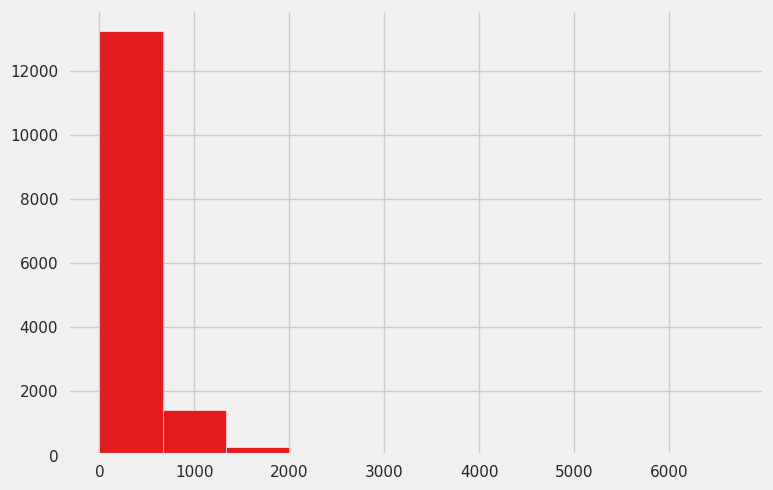

In [ ]:
features["Description"] = features["Description"].apply(lambda text: len(str(text)))
features["Description"].hist()

In [ ]:
features.drop("Name", axis=1, inplace=True)

In [ ]:
from sklearn.preprocessing import RobustScaler
rob = RobustScaler()
rob.fit(features)
features = rob.transform(features)

#### 데이터 나누기

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features,
                                                    target,
                                                    test_size=0.2,
                                                    stratify=target,
                                                    random_state=2023)

print("X_train: {}, \nX_test: {}, \ny_train: {}, \ny_test: {}".format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

X_train: (11994, 325), 
X_test: (2999, 325), 
y_train: (11994,), 
y_test: (2999,)


### 모델 선정

#### LazyClassifier 사용

In [ ]:
lazy_clf = LazyClassifier(verbose=1, predictions=True)
models, predictions = lazy_clf.fit(X_train, X_test, y_train, y_test)

  3%|▎         | 1/29 [00:01<00:55,  1.97s/it]

{'Model': 'AdaBoostClassifier', 'Accuracy': 0.3737912637545849, 'Balanced Accuracy': 0.293717971491015, 'ROC AUC': None, 'F1 Score': 0.35124567866596923, 'Time taken': 1.9723968505859375}


  7%|▋         | 2/29 [00:03<00:38,  1.44s/it]

{'Model': 'BaggingClassifier', 'Accuracy': 0.32744248082694233, 'Balanced Accuracy': 0.2683421353431634, 'ROC AUC': None, 'F1 Score': 0.3262043530644297, 'Time taken': 1.0649638175964355}


 10%|█         | 3/29 [00:03<00:23,  1.10it/s]

{'Model': 'BernoulliNB', 'Accuracy': 0.33977992664221407, 'Balanced Accuracy': 0.2686402925205571, 'ROC AUC': None, 'F1 Score': 0.32632953427670225, 'Time taken': 0.27178215980529785}


 14%|█▍        | 4/29 [03:38<35:39, 85.59s/it]

{'Model': 'CalibratedClassifierCV', 'Accuracy': 0.35011670556852287, 'Balanced Accuracy': 0.26209148572262386, 'ROC AUC': None, 'F1 Score': 0.29473608872504015, 'Time taken': 215.39108395576477}


 21%|██        | 6/29 [03:39<13:55, 36.31s/it]

{'Model': 'DecisionTreeClassifier', 'Accuracy': 0.30343447815938646, 'Balanced Accuracy': 0.2606204253751828, 'ROC AUC': None, 'F1 Score': 0.30665721357488834, 'Time taken': 0.3942441940307617}


 24%|██▍       | 7/29 [03:39<08:59, 24.51s/it]

{'Model': 'DummyClassifier', 'Accuracy': 0.28009336445481825, 'Balanced Accuracy': 0.2, 'ROC AUC': None, 'F1 Score': 0.1225727669403737, 'Time taken': 0.21202659606933594}


 28%|██▊       | 8/29 [03:39<05:52, 16.80s/it]

{'Model': 'ExtraTreeClassifier', 'Accuracy': 0.3071023674558186, 'Balanced Accuracy': 0.25592658572141896, 'ROC AUC': None, 'F1 Score': 0.3086129718967081, 'Time taken': 0.2759697437286377}


 31%|███       | 9/29 [03:46<04:29, 13.47s/it]

{'Model': 'ExtraTreesClassifier', 'Accuracy': 0.3167722574191397, 'Balanced Accuracy': 0.2603684370628374, 'ROC AUC': None, 'F1 Score': 0.3157006687341987, 'Time taken': 6.157449007034302}


 34%|███▍      | 10/29 [03:46<02:58,  9.40s/it]

{'Model': 'GaussianNB', 'Accuracy': 0.03401133711237079, 'Balanced Accuracy': 0.19700775796991093, 'ROC AUC': None, 'F1 Score': 0.016795564063717183, 'Time taken': 0.2635688781738281}


 38%|███▊      | 11/29 [03:47<02:03,  6.88s/it]

{'Model': 'KNeighborsClassifier', 'Accuracy': 0.3177725908636212, 'Balanced Accuracy': 0.26636944759534936, 'ROC AUC': None, 'F1 Score': 0.31686587457271753, 'Time taken': 1.1660127639770508}


 41%|████▏     | 12/29 [04:00<02:27,  8.67s/it]

{'Model': 'LabelPropagation', 'Accuracy': 0.30110036678892965, 'Balanced Accuracy': 0.2548211020633568, 'ROC AUC': None, 'F1 Score': 0.30208252375546113, 'Time taken': 12.775768756866455}


 45%|████▍     | 13/29 [04:24<03:32, 13.29s/it]

{'Model': 'LabelSpreading', 'Accuracy': 0.302434144714905, 'Balanced Accuracy': 0.255988030225411, 'ROC AUC': None, 'F1 Score': 0.30309570275582465, 'Time taken': 23.91658115386963}


 48%|████▊     | 14/29 [04:26<02:30, 10.00s/it]

{'Model': 'LinearDiscriminantAnalysis', 'Accuracy': 0.35445148382794267, 'Balanced Accuracy': 0.2754444934560107, 'ROC AUC': None, 'F1 Score': 0.32862828123475846, 'Time taken': 2.3935391902923584}


 52%|█████▏    | 15/29 [05:26<05:49, 24.93s/it]

{'Model': 'LinearSVC', 'Accuracy': 0.345781927309103, 'Balanced Accuracy': 0.26731495291871116, 'ROC AUC': None, 'F1 Score': 0.31398149544183573, 'Time taken': 59.522472620010376}


 55%|█████▌    | 16/29 [05:28<03:56, 18.23s/it]

{'Model': 'LogisticRegression', 'Accuracy': 0.35111703901300434, 'Balanced Accuracy': 0.27146606141405355, 'ROC AUC': None, 'F1 Score': 0.32385033623662796, 'Time taken': 2.6505932807922363}


 59%|█████▊    | 17/29 [05:28<02:33, 12.82s/it]

{'Model': 'NearestCentroid', 'Accuracy': 0.2807602534178059, 'Balanced Accuracy': 0.2736886890432507, 'ROC AUC': None, 'F1 Score': 0.28312844127382697, 'Time taken': 0.25014781951904297}


 66%|██████▌   | 19/29 [05:30<01:07,  6.70s/it]

{'Model': 'PassiveAggressiveClassifier', 'Accuracy': 0.25375125041680563, 'Balanced Accuracy': 0.21353908395045548, 'ROC AUC': None, 'F1 Score': 0.25319238640264663, 'Time taken': 1.2194876670837402}


 69%|██████▉   | 20/29 [05:31<00:44,  4.94s/it]

{'Model': 'Perceptron', 'Accuracy': 0.2804268089363121, 'Balanced Accuracy': 0.24435632279412883, 'ROC AUC': None, 'F1 Score': 0.2760875771511033, 'Time taken': 0.826221227645874}


 72%|███████▏  | 21/29 [05:33<00:31,  3.97s/it]

{'Model': 'QuadraticDiscriminantAnalysis', 'Accuracy': 0.03267755918639546, 'Balanced Accuracy': 0.19576388797566868, 'ROC AUC': None, 'F1 Score': 0.01428455462085161, 'Time taken': 1.6956684589385986}


 76%|███████▌  | 22/29 [05:38<00:31,  4.44s/it]

{'Model': 'RandomForestClassifier', 'Accuracy': 0.33777925975325107, 'Balanced Accuracy': 0.2748731361931012, 'ROC AUC': None, 'F1 Score': 0.3320907554026351, 'Time taken': 5.535634994506836}


 79%|███████▉  | 23/29 [05:38<00:19,  3.22s/it]

{'Model': 'RidgeClassifier', 'Accuracy': 0.35111703901300434, 'Balanced Accuracy': 0.2688810071409893, 'ROC AUC': None, 'F1 Score': 0.3168770554071034, 'Time taken': 0.36580657958984375}


 83%|████████▎ | 24/29 [05:39<00:12,  2.55s/it]

{'Model': 'RidgeClassifierCV', 'Accuracy': 0.3507835945315105, 'Balanced Accuracy': 0.268633175666392, 'ROC AUC': None, 'F1 Score': 0.3165689047401347, 'Time taken': 0.9917323589324951}


 86%|████████▌ | 25/29 [05:44<00:12,  3.16s/it]

{'Model': 'SGDClassifier', 'Accuracy': 0.29709903301100365, 'Balanced Accuracy': 0.22967671992830194, 'ROC AUC': None, 'F1 Score': 0.27744503039426704, 'Time taken': 4.576194763183594}


 90%|████████▉ | 26/29 [07:08<01:22, 27.45s/it]

{'Model': 'SVC', 'Accuracy': 0.3591197065688563, 'Balanced Accuracy': 0.27289817940775674, 'ROC AUC': None, 'F1 Score': 0.315405249358976, 'Time taken': 84.10757160186768}


 97%|█████████▋| 28/29 [08:47<00:37, 37.58s/it]

{'Model': 'XGBClassifier', 'Accuracy': 0.3864621540513504, 'Balanced Accuracy': 0.3033039493305542, 'ROC AUC': None, 'F1 Score': 0.36675061817154303, 'Time taken': 98.80997800827026}


100%|██████████| 29/29 [08:48<00:00, 18.23s/it]

{'Model': 'LGBMClassifier', 'Accuracy': 0.38746248749583195, 'Balanced Accuracy': 0.30445641656202055, 'ROC AUC': None, 'F1 Score': 0.36714788872572685, 'Time taken': 1.2980844974517822}


In [ ]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.39,0.30,None,0.37,1.30
XGBClassifier,0.39,0.30,None,0.37,98.81
AdaBoostClassifier,0.37,0.29,None,0.35,1.97
LinearDiscriminantAnalysis,0.35,0.28,None,0.33,2.39
RandomForestClassifier,0.34,0.27,None,0.33,5.54
NearestCentroid,0.28,0.27,None,0.28,0.25
SVC,0.36,0.27,None,0.32,84.11
LogisticRegression,0.35,0.27,None,0.32,2.65
RidgeClassifier,0.35,0.27,None,0.32,0.37
